![Banner-Preparaci-n.png](https://i.postimg.cc/q7vd5LZP/Banner-Preparaci-n.png)

# Integración y preparación de datos

## L3: Reducir dimensionalidad - PCA

En este notebook veremos cómo solucionar un problema en una empresa de retail a través de una transformación de datos en la cual se reducen los datos para obtener la mayor cantidad de información con menos variables(reduciendo dimensionalidad)

**Autor:** David Ocampo 

d.ocampo@uniandes.edu.co

### 1. Contexto del negocio 

La organización se ha dado cuenta que por el volúmen de datos que actualmente se maneja los análisis cada vez se tardan mucho más tiempo en finalizar, esto se debe a que el origen de los datos todos los días crece(así como las ventas), por lo tanto se ha propuesto realizar una reducción de dimensionalidad para poder realizar análisis más rápidos y eficientes


### Objetivos

1. Identificar las variables que son de utilidad para un PCA
2. Crear un PCA 
3. Tener elementos para decidir cómo seleccionar el número de componentes en un PCA

### 2. Importación de librerías y archivos

En las siguientes líneas se importarán las librerías necesarias, las cuales son **Pandas** para el manejo de datos  y **ScikitLearn** para la reducción de dimensionalidad

In [1]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para manejo de datos
import pandas as pd
# Librería para estandarizar los datos
from sklearn.preprocessing import StandardScaler
# Librería para realizar PCA
from sklearn.decomposition import PCA
# Librería para graficar
import matplotlib.pyplot as plt
# Obtener colores aletorios
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))


In [2]:
#Cargar los datos
data=pd.read_csv('Ordenes_productos_C3.csv',sep=';',encoding='latin-1')
#Visualizar la carga de datos
data.head()

,orden_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,volumen_cm3_producto
0,1564PA53A-A,PA53,VE6785,1-ago-17,-7.27,27.12,52565,Providencia,NariÃ±o,ElectrodomÃ©sticos,19,28,29,1324,48,17,11,8976
1,28983PD80A-A,PD80,VE3342,31-may-18,3.22,6.01,52203,Colon,NariÃ±o,Celulares,18,29,16,4677,26,6,16,2496
2,38613PB61A-A,PB61,VE7671,27-oct-17,104.18,17.70,52051,Arboleda,NariÃ±o,Ropa_de_adultos,13,30,29,101,17,26,24,10608
3,4978PS63A-A,PS63,VE1492,13/12/2017,348.39,34.84,52323,Gualmatan,NariÃ±o,CarnicerÃ­a,33,26,13,514,47,16,43,32336
4,73781PA71A-A,PA71,VE8575,1/11/2018 0:00,29.03,30.23,5002,Abejorral,Antioquia,ElectrodomÃ©sticos,27,3,13,2962,20,26,28,14560


Vemos que en la fuente de datos existe una gran cantidad de datos numéricos, estos datos nos aportan bastante información sin embargo es bastante demorado procesar tanta información, tengamos en cuenta que para la explicación del notebook tenemos una muestra de los datos totales, sin embargo, en un comercio real podemos llegar a hablar de millones de transacciones, incluso diarias, y para nuestro interés es mucho mejor trabajar con la mayor cantidad de información pero con la menor cantidad de dimensiones, esto lo vamos a lograr con el uso del **PCA(Principal component analysis) o en español análisis de componentes principales**

### 3. PCA - Análisis de componentes principales

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchos atributos a la vez que conserva su información. Supóngase que existe una muestra con *n* individuos cada uno con *p* atributos, es decir, el espacio muestral tiene p dimensiones. PCA permite encontrar un número de factores menores que los atributos originales que explican aproximadamente lo mismo que los *p* atributos originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan menos valores. Cada una de estos nuevos atributos se llama componente principal.

Para este ejercicio únicamente vamos a trabajar con las variables numéricas de la fuente de datos para así no tener que convertir las variables categóricas y se pueda entender el concepto mucho más fácil

### 3.1. Selección de atributos

Vamos a elegir los atributos que nos aportan información numérica:
* longitud_nombre_producto
* longitud_descripcion_producto
* cantidad_fotos_producto
* longitud_cm_producto
* altura_cm_producto
* ancho_cm_producto
* precio
* valor_flete

Adicionalmente la categoría del producto, ya que esta nos va a permitir luego graficar los datos y entenderlos de una manera más sencilla y entender la utilidad de la reducción de variables
* nombre_categoria_producto

In [3]:
# Seleccionar las variables de interés
data_num=data[['nombre_categoria_producto',
       'longitud_nombre_producto', 'longitud_descripcion_producto',
       'cantidad_fotos_producto', 'longitud_cm_producto', 'altura_cm_producto',
       'ancho_cm_producto','precio', 'valor_flete']]
#Convertimos los datos vacíos a cero
data_num=data_num.fillna(0)
# visualizar el subconjunto seleccionado 
data_num.head()

,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,precio,valor_flete
0,ElectrodomÃ©sticos,19,28,29,48,17,11,-7.27,27.12
1,Celulares,18,29,16,26,6,16,3.22,6.01
2,Ropa_de_adultos,13,30,29,17,26,24,104.18,17.70
3,CarnicerÃ­a,33,26,13,47,16,43,348.39,34.84
4,ElectrodomÃ©sticos,27,3,13,20,26,28,29.03,30.23


### 3.2. Estandarizar los datos

La PCA se efectúa por escala, por lo que debe escalar las características de sus datos antes de aplicar la PCA. Podemos utilizar StandardScaler para ayudarlo a estandarizar las características del conjunto de datos en una escala unitaria (media = 0 y varianza = 1) como vimos en los anteriores video tutoriales, este es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático. 

In [4]:
# Separamos los atributos de la etiqueta(categoría)
atributos = data_num.drop(['nombre_categoria_producto'],axis=1)
categoria = data_num[['nombre_categoria_producto']]
# crear el objeto de estandarizar
estandar = StandardScaler()
# aplicar la transformación
atributo_estandar=estandar.fit_transform(atributos)
#Visulizar la transformación
atributo_estandar

array([[-0.08669084,  0.67820068,  0.8397024 , ..., -1.13478551,
        -0.850252  ,  0.35134904],
       [-0.17188523,  0.76383155, -0.28200872, ..., -0.68119   ,
        -0.7710564 , -0.66184988],
       [-0.59785719,  0.84946242,  0.8397024 , ...,  0.0445628 ,
        -0.00884591, -0.10077478],
       ...,
       [-1.02382915,  0.50693893,  0.32198957, ..., -0.1368754 ,
        -0.48953075, -0.04029962],
       [ 1.4468082 , -0.00684632, -1.66257626, ..., -0.0461563 ,
         1.58405018,  0.6230073 ],
       [ 1.10603064,  1.6201403 ,  0.92598787, ..., -0.68119   ,
        -0.41592188, -0.85383452]])

### 3.3. Proyección PCA a n dimensiones

Los datos originales tienen 8 columnas (que están mencionadas arriba en el documento). En esta sección, el código proyecta los datos originales que tienen 8 dimensiones en n dimensiones, esta cantidad de dimensiones son elegidas por el usuario y por el criterio de varianza total explicada. Es importante aclarar que después de la reducción de dimensionalidad, generalmente no hay un significado particular asignado a cada componente principal. Los nuevos componentes son solo las dos dimensiones principales de variación.

Vamos a realizar el PCA con 5 dimensiones, luego veremos cómo influye en la varianza explicada esta cantidad de componentes elegidos

In [5]:
# Elegir numero de componentes
n_comp=5
# Creamos el objeto pca
pca = PCA(n_components=n_comp)
# Realizamos la transformación
componentes_principales = pca.fit_transform(atributo_estandar)
# Crear la tabla con los componentes
data_componentes = pd.DataFrame(data = componentes_principales
             , columns = ['componente principal 1', 'componente principal 2',
                         'componente principal 3','componente principal 4',
                         'componente principal 5'])
#Visualizar la nueva tabla creada
data_componentes.head()

,componente principal 1,componente principal 2,componente principal 3,componente principal 4,componente principal 5
0,-0.165477,-1.105732,-0.650255,0.877043,0.937284
1,-0.514386,-0.605951,-0.900786,-0.139876,-0.662208
2,0.948670,-0.356064,0.442002,0.827765,-0.018589
3,1.475139,0.215796,0.185729,-1.172187,-0.653629
4,-0.695579,1.570005,0.836503,0.142639,-0.017694


Vemos que la transformación a componentes ya está realizada, y como se mencionó antes los componentes no tienen ninguna interpretación sin embargo debemos ver cuánta es la varianza expliada por estos, así será el criterio de decisión para elegir el número final de componentes

### 3.4. Varianza explicada

La varianza explicada le dice cuánta información (varianza) se puede atribuir a cada uno de los componentes principales. Esto es importante ya que, si bien puede convertir un espacio de 8 dimensiones en un espacio de 4 dimensiones, se pierde información relacionada a las variables de entrada, como lo es la varianza.
Al usar el atributo:


```python
pca.explained_variance_ratio_
```


Se puede ver que el primer la cantidad de varianza que tiene cada componente y la conjunta cuánto nos suma en total

In [6]:
# Varianza explicada por los n componentes elegidos 
pca.explained_variance_ratio_

array([0.14480469, 0.13670964, 0.12881321, 0.12464447, 0.12152866])

In [7]:
# Suma de varianza explicada
sum(pca.explained_variance_ratio_)

0.656500657118252

In [8]:
# suma acumulativa
pca.explained_variance_ratio_.cumsum()

array([0.14480469, 0.28151432, 0.41032753, 0.534972  , 0.65650066])

Vemos que la varianza explicada por el primer componente es de 13% aproximadamente y el segundo 12.7% en conjunto no suma más de 25% por tanto debemos elegir más componentes para obtener mayor varianza, sin embargo podemos graficar la totalidad de varianza explicada para eso utilizamos una cantidad más grande de componentes y graficamos, la elección de componentes máximos puede ser la misma cantidad de atributos, en este caso 8 

In [9]:
# Elegir numero de componentes máximo
n_comp=8
# Creamos el objeto pca
pca_max = PCA(n_components=n_comp)
# Ajustamos los atributos al pca
pca_max.fit_transform(atributo_estandar)

array([[-0.16547733, -1.10573155, -0.65025483, ..., -0.37690686,
         1.07689895, -0.39449381],
       [-0.51438635, -0.60595064, -0.90078634, ..., -1.11980845,
         0.06700979, -0.49138819],
       [ 0.94866997, -0.35606449,  0.44200168, ..., -0.72047636,
        -0.76226754, -0.10306573],
       ...,
       [ 0.32589476, -0.3566301 ,  0.03331459, ..., -1.83102865,
        -0.58892569, -0.03320057],
       [ 0.77408045,  2.47862548, -1.02384636, ...,  0.2000493 ,
        -0.39998563, -0.65052793],
       [ 0.4234929 , -1.12574574, -1.13833454, ...,  0.56500463,
         0.61080038, -0.40202229]])

<BarContainer object of 8 artists>

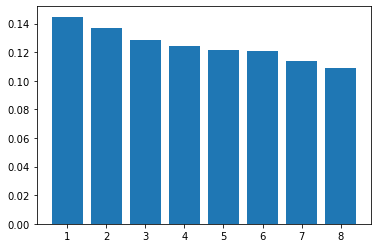

In [10]:
# Revisamos la varianza explicada con un gráfica
componentes = list(range(1,9))
varianza = list(pca_max.explained_variance_ratio_)
plt.bar(componentes,varianza)

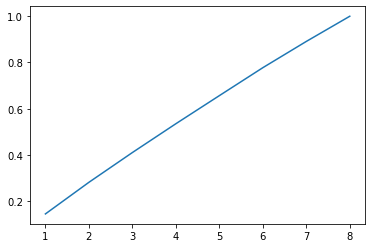

In [11]:
# Revisamos gráfico acumulado de varianza
varianza_acumulada = list(pca_max.explained_variance_ratio_.cumsum())
plt.plot(componentes,varianza_acumulada)

Vemos que con 5 componentes principales podemos tener casi el 70% de varianza y estamos reduciendo la dimensión a prácticamente la mitad, por lo tanto vamos a usar 5 componentes para el análisis y luego vamos a graficar los componentes con las diferentes etiquetas

In [12]:
# Elegir numero de componentes
n_comp=5
# Creamos el objeto pca
pca = PCA(n_components=n_comp)
# Realizamos la transformación
componentes_principales = pca.fit_transform(atributo_estandar)
# Crear la tabla con los componentes
data_componentes = pd.DataFrame(data = componentes_principales
             , columns = ['componente principal 1', 'componente principal 2',
                         'componente principal 3', 'componente principal 4',
                         'componente principal 5'])
# Visualizamos la tabla
data_componentes.head()

,componente principal 1,componente principal 2,componente principal 3,componente principal 4,componente principal 5
0,-0.165477,-1.105732,-0.650255,0.877043,0.937284
1,-0.514386,-0.605951,-0.900786,-0.139876,-0.662208
2,0.948670,-0.356064,0.442002,0.827765,-0.018589
3,1.475139,0.215796,0.185729,-1.172187,-0.653629
4,-0.695579,1.570005,0.836503,0.142639,-0.017694


In [13]:
# Unir el data set con las categorías
data_final = pd.concat([data_componentes, categoria], axis = 1)
data_final.head()

,componente principal 1,componente principal 2,componente principal 3,componente principal 4,componente principal 5,nombre_categoria_producto
0,-0.165477,-1.105732,-0.650255,0.877043,0.937284,ElectrodomÃ©sticos
1,-0.514386,-0.605951,-0.900786,-0.139876,-0.662208,Celulares
2,0.948670,-0.356064,0.442002,0.827765,-0.018589,Ropa_de_adultos
3,1.475139,0.215796,0.185729,-1.172187,-0.653629,CarnicerÃ­a
4,-0.695579,1.570005,0.836503,0.142639,-0.017694,ElectrodomÃ©sticos


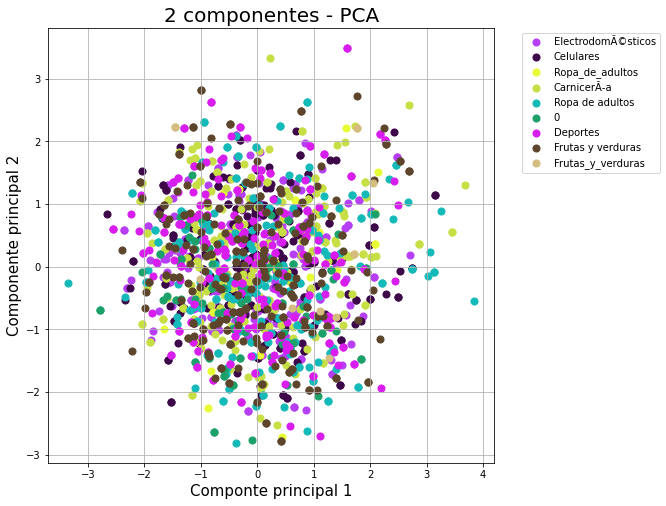

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componte principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('2 componentes - PCA', fontsize = 20)
targets = list(categoria['nombre_categoria_producto'].unique())
colors = get_colors(len(targets))
for target, color in zip(targets,colors):
    indicesToKeep = data_final['nombre_categoria_producto'] == target
    ax.scatter(data_final.loc[indicesToKeep, 'componente principal 1']
               , data_final.loc[indicesToKeep, 'componente principal 2']
               , c = color
               , s = 50)
ax.legend(targets,bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid()

Vemos que por la gran cantidad de datos nos es posible ver fácilmente diferentes categorías, además los primeros cuatro componentes recogen menos del 50% de la varianza, por lo tanto este gráfico nos pude ayudar cuando se obtenga mayor varianza en los primeros componentes

![Banner-Preparaci-n.png](https://i.postimg.cc/q7vd5LZP/Banner-Preparaci-n.png)